In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the datasets

books = pd.read_csv("c:/Users/Admin/books.csv")
users = pd.read_csv("c:/Users/Admin/users.csv")
ratings00 = pd.read_csv("c:/Users/Admin/Ratings.csv")

print(books.shape)
print(users.shape)
print(ratings00.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


## Books dataset

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
# Check the types of columns

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
# Drop the columns that are not necessary

books.drop(columns = ['Image-URL-L','Image-URL-M','Publisher'], inplace = True)

In [9]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,http://images.amazon.com/images/P/0192126040.0...


In [10]:
# Rename the columns

dict = {'ISBN':'book_id',
        'Book-Title': 'title',
        'Book-Author': 'author',
        'Year-Of-Publication': 'publication_year',
        'Image-URL-S':'Cover_image'}

books.rename(columns=dict,inplace=True)

In [11]:
books.rename(columns={'author': 'authors'}, inplace=True)

In [12]:
books

,book_id,title,authors,publication_year,Cover_image
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,http://images.amazon.com/images/P/0192126040.0...


In [13]:
# Check if there is missing value

books.isnull().sum()

book_id             0
title               0
authors             2
publication_year    0
Cover_image         0
dtype: int64

In [14]:
# Check if there is duplicates in book_id 

print(books['book_id'].nunique())

271360


In [15]:
# Check values of publication_year

print(books['publication_year'].value_counts())

publication_year
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1924        1
2012        1
1927        1
1931        1
2037        1
Name: count, Length: 202, dtype: int64


In [16]:
books['publication_year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [17]:
# Drop the rows with with publication_year is 'DK Publishing Inc' and 'Gallimard'

books.drop(books[books['publication_year'] == 'DK Publishing Inc'].index, inplace = True)
books.drop(books[books['publication_year'] == 'Gallimard'].index, inplace = True)

In [18]:
books['publication_year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [19]:
# Add a new Modified titles column

# Replace the book titles with a regular expression pattern

books["mod_title"] = books["title"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)

In [20]:
# Transform the book titles to lowercase

books["mod_title"] = books["mod_title"].str.lower()

In [21]:
books

,book_id,title,authors,publication_year,Cover_image,mod_title
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...,classical mythology
1,0002005018,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,clara callan
2,0060973129,Decision in Normandy,Carlo D'Este,1991,http://images.amazon.com/images/P/0060973129.0...,decision in normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,http://images.amazon.com/images/P/0374157065.0...,flu the story of the great influenza pandemic ...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,http://images.amazon.com/images/P/0393045218.0...,the mummies of urumchi
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,http://images.amazon.com/images/P/0440400988.0...,theres a bat in bunk five
271356,0525447644,From One to One Hundred,Teri Sloat,1991,http://images.amazon.com/images/P/0525447644.0...,from one to one hundred
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,http://images.amazon.com/images/P/006008667X.0...,lily dale the true story of the town that tal...
271358,0192126040,Republic (World's Classics),Plato,1996,http://images.amazon.com/images/P/0192126040.0...,republic worlds classics


In [22]:
books_copy = books

In [23]:
# Change the publication year to int type before feeding it to the models

books['publication_year'] = books['publication_year'].astype('int')

Text(0.5, 1.0, 'Density of Publications over Time ')

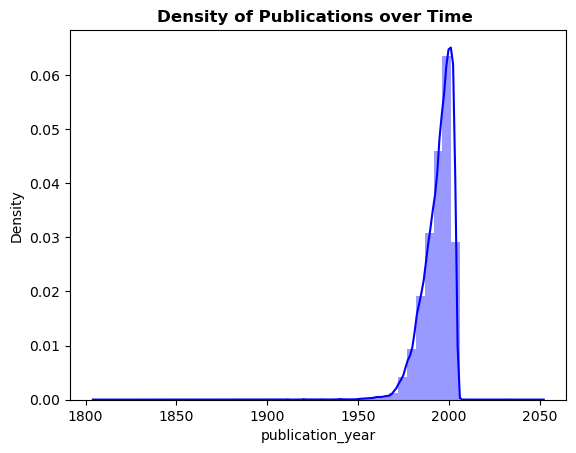

In [64]:
# Plotting the distribution of Year of Publication

sns.distplot(books[books['publication_year']>1800]['publication_year'],color='blue',bins=50);
plt.title("Density of Publications over Time ", fontweight='bold')

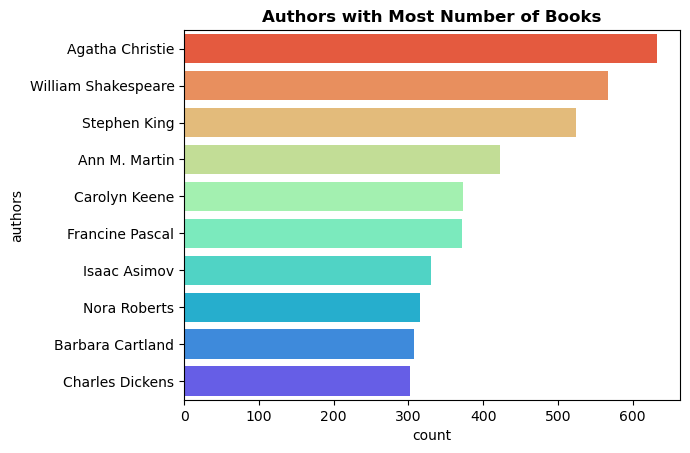

In [66]:
# Plotting the top 10 books

sns.countplot(y='authors',data=books,order=pd.value_counts(books['authors']).iloc[:10].index, palette='rainbow_r')
plt.title("Authors with Most Number of Books", fontweight='bold');

In [28]:
# Store the dataframe to CSV file
books.to_csv('books_cleaned.csv')

# Users dataset

In [30]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [31]:
# Rename the columns

dict = {'User-ID':'user_id',
        'Location': 'location',
        'Age': 'age',
        }

users.rename(columns=dict,inplace=True)

In [32]:
users

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [33]:
user_copy = users

In [34]:
# Check if there is duplicates in user_id 

print(users['user_id'].nunique())

278858


In [35]:
# Check if there is missing value

users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [36]:
# Check age values

users['age'].value_counts()

age
24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
168.0       1
132.0       1
159.0       1
186.0       1
127.0       1
Name: count, Length: 165, dtype: int64

In [37]:
# Drop the rows with null values of age

users.dropna(subset=['age'], inplace=True)

In [38]:
# Change the age to int making it meaningful

users['age'] = users['age'].astype('int')

In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168096 entries, 1 to 278854
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   168096 non-null  int64 
 1   location  168096 non-null  object
 2   age       168096 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 4.5+ MB


In [40]:
# Distribution of age 

# u =users.age.value_counts().sort_index() # counting the values of age
# plt.bar(u.index, u.values) # barplot
# plt.xlabel('Age')
# plt.ylabel('Count of Users')
# plt.xlim(xmin = 0)
# plt.show()

In [41]:
# Store the dataframe to CSV file

users.to_csv('users_cleaned.csv')

# Ratings dataset

In [43]:
# Rename the columns

dict = {'User-ID':'user_id',
        'ISBN': 'book_id',
        'Book-Rating': 'rating',
        }

ratings00.rename(columns=dict,inplace=True)

In [44]:
ratings00.head()

,user_id,book_id,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [45]:
ratings00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   book_id  1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [46]:
# Average Book ratings with respect to top 10 books using catplot

# ratings = merged_df.groupby(['title','author'])['rating'].agg(['count','mean']).sort_values(by='mean', ascending=False).reset_index()
# sns.catplot(x='mean', y='Book_Title', data=book_rating[book_rating['count']>500][:10], kind='bar', palette = 'Paired',hue='Book_Author' )
# plt.xlabel('Average Ratings')
# plt.ylabel('Books')
# plt.title('Most Famous Books', fontweight='bold');

In [47]:
ratings00_copy = ratings00

In [48]:
ratings002 = ratings00_copy

In [49]:
ratings002

,user_id,book_id,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [50]:
# Store the dataframe to CSV file

ratings002.to_csv('ratings002_cleaned.csv')

In [51]:
# Drop 0 value of ratings

ratings00.drop(ratings00[ratings00['rating'] == 0].index, inplace=True)

In [52]:
# Check ratings value

ratings00['rating'].value_counts()

rating
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [53]:
ratings00

,user_id,book_id,rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Text(0.5, 1.0, 'Ratings Distribution')

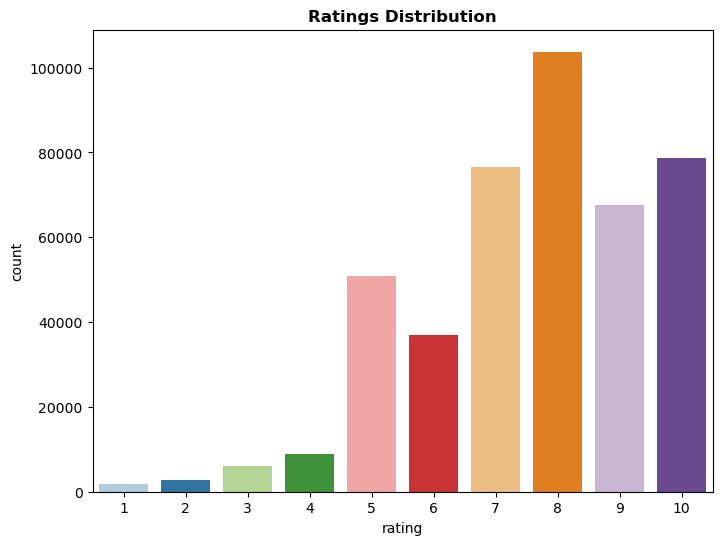

In [54]:
# Plot ratings distribution

plt.figure(figsize=(8,6))
sns.countplot(x="rating",palette = 'Paired',data=ratings00)
plt.title("Ratings Distribution", fontweight='bold')

In [55]:
# Store the dataframe to CSV file
ratings00.to_csv('ratings00_cleaned.csv')

In [56]:
# Add average rating column 

ratings00_copy['avg_rating'] = ratings00_copy.groupby('book_id')['rating'].transform('mean')

In [57]:
# Add rating count column 

ratings00_copy['rating_count'] = ratings00_copy.groupby('book_id')['rating'].transform('sum')

In [58]:
ratings00_copy['avg_rating'] = ratings00_copy['avg_rating'].round(2)

In [59]:
ratings00_copy

,user_id,book_id,rating,avg_rating,rating_count
1,276726,0155061224,5,5.00,5
3,276729,052165615X,3,3.00,3
4,276729,0521795028,6,6.00,6
6,276736,3257224281,8,6.75,27
7,276737,0600570967,6,6.00,6
...,...,...,...,...,...
1149773,276704,0806917695,5,5.00,5
1149775,276704,1563526298,9,7.00,21
1149777,276709,0515107662,10,8.44,152
1149778,276721,0590442449,10,9.00,18


In [60]:
# Store the dataframe to CSV file
ratings00_copy.to_csv('ratings_avg_counts.csv')

In [61]:
# Drop userid column
ratings00_copy.drop('user_id', axis = 1, inplace = True)

In [62]:
ratings00_copy.head()

,book_id,rating,avg_rating,rating_count
1,0155061224,5,5.00,5
3,052165615X,3,3.00,3
4,0521795028,6,6.00,6
6,3257224281,8,6.75,27
7,0600570967,6,6.00,6


In [63]:
# Store the dataframe to CSV file
ratings00_copy.to_csv('ratings_avg_counts_nouser.csv')